# Project 2: Reproducibility in Natural Language Processing



In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark') 

In [4]:
# read in SOTU.csv using pandas, name the variable `sou` for simplicity
# the below cell is what the output should look like

In [5]:
sou = pd.read_csv("data/SOTU.csv")
sou

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
...,...,...,...,...
241,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264
242,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
243,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069
244,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069


In [13]:
import spacy
from tqdm import tqdm
from collections import Counter

nlp = spacy.load("en_core_web_sm")

In [14]:
# subset the speech dataframe for speeches from 2000 and onwards
speeches2000 = sou[sou["Year"] >= 2000]
speeches2000

,President,Year,Text,Word Count
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169
5,Donald J. Trump,2019.0,"\nThe President. Madam Speaker, Mr. Vice Presi...",5519
6,Donald J. Trump,2018.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",5755
7,Donald J. Trump,2017.0,"\nThank you very much. Mr. Speaker, Mr. Vice P...",4903
8,Barack Obama,2016.0,"\nThank you. Mr. Speaker, Mr. Vice President, ...",5956
9,Barack Obama,2015.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",6659


In [15]:
# Process each speeches using the 'nlp' function
# Hint - loop through each speech and pass the text into the nlp function above, storing the output in a list
speeches2000["Raw Tokens"] = speeches2000["Text"].apply(nlp)
speeches2000
# should take about 30 seconds to process

/tmp/ipykernel_206/2513807134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeches2000["Raw Tokens"] = speeches2000["Text"].apply(nlp)


,President,Year,Text,Word Count,Raw Tokens
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003,"(\n, [, Before, speaking, ,, the, President, p..."
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978,"(\n, The, President, ., Mr., Speaker, —, —, \n..."
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539,"(\n, The, President, ., Thank, you, all, very,..."
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734,"(\n, The, President, ., Thank, you, ., Thank, ..."
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169,"(\n, The, President, ., Thank, you, very, much..."
5,Donald J. Trump,2019.0,"\nThe President. Madam Speaker, Mr. Vice Presi...",5519,"(\n, The, President, ., Madam, Speaker, ,, Mr...."
6,Donald J. Trump,2018.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",5755,"(\n, The, President, ., Mr., Speaker, ,, Mr., ..."
7,Donald J. Trump,2017.0,"\nThank you very much. Mr. Speaker, Mr. Vice P...",4903,"(\n, Thank, you, very, much, ., Mr., Speaker, ..."
8,Barack Obama,2016.0,"\nThank you. Mr. Speaker, Mr. Vice President, ...",5956,"(\n, Thank, you, ., Mr., Speaker, ,, Mr., Vice..."
9,Barack Obama,2015.0,"\nThe President. Mr. Speaker, Mr. Vice Preside...",6659,"(\n, The, President, ., Mr., Speaker, ,, Mr., ..."


In [16]:
speeches2000["Tokens"] = speeches2000["Raw Tokens"].apply(
    lambda doc: [t.text.lower() for t in doc 
                 if not t.is_stop and not t.is_punct and not t.is_space])


/tmp/ipykernel_206/2746649438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeches2000["Tokens"] = speeches2000["Raw Tokens"].apply(


In [17]:
# print top 20 tokens
# Hint - use Counter, and one of the Counter object's methods to display the top 20
# Count the frequency of token texts (case-sensitive)

all_tokens = [w for doc_tokens in speeches2000["Tokens"] for w in doc_tokens]
Counter(all_tokens).most_common(20)


[('america', 816),
 ('people', 637),
 ('american', 582),
 ('new', 530),
 ('years', 439),
 ('americans', 437),
 ('world', 425),
 ('year', 406),
 ('country', 369),
 ('jobs', 348),
 ('tonight', 344),
 ('work', 324),
 ('know', 323),
 ('let', 320),
 ('congress', 317),
 ('nation', 311),
 ('time', 301),
 ('help', 282),
 ('need', 266),
 ('tax', 255)]

In [18]:
# Count the frequency of lemmas (base forms, typically lowercased)
speeches2000["Lemmas"] = speeches2000["Raw Tokens"].apply(
    lambda doc: [t.lemma_.lower() for t in doc 
                 if not t.is_stop and not t.is_punct and not t.is_space])

all_lemmas = [w for doc_tokens in speeches2000["Lemmas"] for w in doc_tokens]
Counter(all_lemmas).most_common(20)

/tmp/ipykernel_206/1798474617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  speeches2000["Lemmas"] = speeches2000["Raw Tokens"].apply(


[('year', 845),
 ('america', 816),
 ('people', 639),
 ('american', 587),
 ('work', 557),
 ('new', 532),
 ('job', 486),
 ('country', 435),
 ('americans', 432),
 ('world', 426),
 ('know', 395),
 ('nation', 388),
 ('help', 378),
 ('need', 353),
 ('time', 351),
 ('tonight', 344),
 ('child', 332),
 ('let', 326),
 ('congress', 317),
 ('come', 301)]

#### Token versus Lemma Comparison

The words 'tax' and 'jobs' are contained in the tokens but not in the lemmas. The words 'job' and 'child' are contained in the lemmas, but not in the tokens. It appears that the 'year' + 'years' in the tokens sum up to 'year' in lemma. Because the word 'let' appears 320 times in the tokens, and 326 in the lemmas, we can conclude that the word let's appears 6 times. The variation in the tokens for 'child' does not make the top 20 list, wheras when you remove the variations in the lemma, child is a highly frequently used word.

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

In [44]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from spacy import displacy
from bertopic import BERTopic
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis
import pyLDAvis.gensim_models


In [45]:
def preprocess_text(text): 
    doc = nlp(text) 
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and len(token.lemma_) > 3]

In [57]:
# PROMPT: Classification - building a classifier to detect democratic versus republican state of the union speeches 
#         using 100 random speeches to train the model, and the remaining to test. Train using only democratic, republican, independent, and whig.
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    "Democratic",
    "Republican",
    "Independent",
    "Whig"
]

In [58]:
# Reading in the file for all US Presidents and their parties
presidents_and_parties = pd.read_csv("presidents_and_parties.csv")
presidents_and_parties = presidents_and_parties[presidents_and_parties["country"] == "USA"]
# Create a new dataframe with just the president's name and party
pres_parties = presidents_and_parties[["name", "party"]]
# Merge the dataframes on the president name to add the party to the sou dataframe
df_merged_with_party = sou.merge(pres_parties, left_on="President", right_on="name")
df_merged_with_party = df_merged_with_party[["President", "Year", "Text", "Word Count", "party"]]
df_merged = df_merged_with_party[df_merged_with_party["party"].isin(categories)]

df_pres_parties = df_merged[df_merged["party"].isin(categories)]
df_pres_parties

,President,Year,Text,Word Count,party
0,Joseph R. Biden,2024.0,"\n[Before speaking, the President presented hi...",8003,Democratic
1,Joseph R. Biden,2023.0,\nThe President. Mr. Speaker——\n[At this point...,8978,Democratic
2,Joseph R. Biden,2022.0,"\nThe President. Thank you all very, very much...",7539,Democratic
3,Joseph R. Biden,2021.0,\nThe President. Thank you. Thank you. Thank y...,7734,Democratic
4,Donald J. Trump,2020.0,\nThe President. Thank you very much. Thank yo...,6169,Republican
...,...,...,...,...,...
220,George Washington,1791.0,\nFellow-Citizens of the Senate and House of R...,2264,Independent
221,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069,Independent
222,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069,Independent
223,George Washington,1790.0,\nFellow-Citizens of the Senate and House of R...,1069,Independent


In [59]:
# Training set
data_train = df_pres_parties.sample(n=100, replace=False)

# Test set
data_test = df_pres_parties.drop(data_train.index)

In [60]:
def train_test_datasets(verbose=False, remove=()):
    """Load and vectorize the Presidents speeches"""

    # order of labels in `target_names` can be different from `categories`
    target_names = categories

    # split target in a training set and a test set
    y_train, y_test = data_train["party"], data_test["party"]

    # Extracting features from the training data using a sparse vectorizer
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")
    X_train = vectorizer.fit_transform(data_train.Text)

    # Extracting features from the test data using the same vectorizer
    X_test = vectorizer.transform(data_test.Text)

    feature_names = vectorizer.get_feature_names_out()

    return X_train, X_test, y_train, y_test, feature_names, target_names
    
X_train, X_test, y_train, y_test, feature_names, target_names = train_test_datasets(verbose = False, remove=("headers", "footers", "quotes"))


In [61]:
from sklearn.linear_model import RidgeClassifier

clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


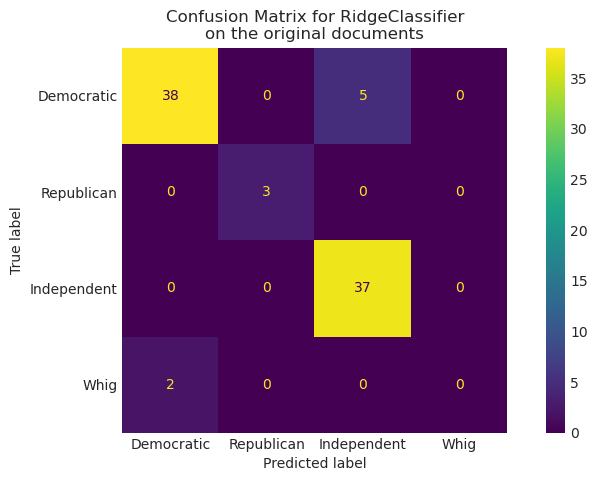

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(f"Confusion Matrix for {clf.__class__.__name__}\non the original documents")

top 5 keywords per class:
  Democratic    Republican Independent        Whig
0  democracy     gentlemen      budget       texas
1  americans  satisfaction        cent   blessings
2     crisis     happiness       major      specie
3      build        tribes     billion  convention
4      banks       objects    research       claim


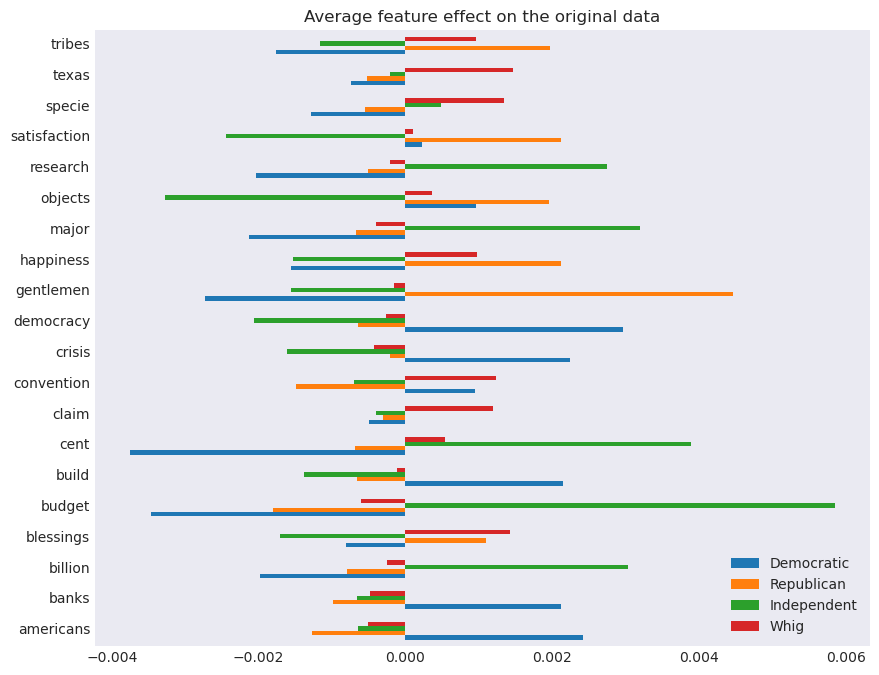

In [67]:
import numpy as np

def plot_feature_effects():
    # learned coefficients weighted by frequency of appearance
    average_feature_effects = clf.coef_ * np.asarray(X_train.mean(axis=0)).ravel()
    for i, label in enumerate(target_names):
        top5 = np.argsort(average_feature_effects[i])[-5:][::-1]
        if i == 0:
            top = pd.DataFrame(feature_names[top5], columns=[label])
            top_indices = top5
        else:
            top[label] = feature_names[top5]
            top_indices = np.concatenate((top_indices, top5), axis=None)
    top_indices = np.unique(top_indices)
    predictive_words = feature_names[top_indices]

    # plot feature effects
    bar_size = 0.25
    padding = 0.75
    y_locs = np.arange(len(top_indices)) * (4 * bar_size + padding)

    fig, ax = plt.subplots(figsize=(10, 8))
    for i, label in enumerate(target_names):
        ax.barh(
            y_locs + (i - 2) * bar_size,
            average_feature_effects[i, top_indices],
            height=bar_size,
            label=label,
        )
    ax.set(
        yticks=y_locs,
        yticklabels=predictive_words,
        ylim=[
            0 - 4 * bar_size,
            len(top_indices) * (4 * bar_size + padding) - 4 * bar_size,
        ],
    )
    ax.legend(loc="lower right")

    print("top 5 keywords per class:")
    print(top)

    return ax


_ = plot_feature_effects().set_title("Average feature effect on the original data")

In [68]:
# run on all the speeches across all parties
df_sample = df_merged_with_party

vectorizer = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")
X_train = vectorizer.fit_transform(data_train.Text)

# Extracting features from the test data using the same vectorizer
sample_test = vectorizer.transform(df_sample.Text)
party_prediction = clf.predict(sample_test)
df_sample["Predicted"] = party_prediction
df_sample['contains_keyword'] = df_sample.apply(lambda row: row['party'].__contains__(row['Predicted']), axis=1)
wrong_prediction = df_sample[((df_sample["party"] != df_sample["Predicted"]) & (df_sample["contains_keyword"] == False))]
wrong_prediction


,President,Year,Text,Word Count,party,Predicted,contains_keyword
32,Jimmy Carter,1981.0,\nTo the Congress of the United States:\nThe S...,33065,Democratic,Republican,False
107,Grover Cleveland,1895.0,\nTo the Congress of the United States:\nThe p...,14526,Democratic,Republican,False
108,Grover Cleveland,1895.0,\nTo the Congress of the United States:\nThe p...,14526,Democratic,Republican,False
123,Grover Cleveland,1885.0,\nTo the Congress of the United States:\nYour ...,19631,Democratic,Republican,False
124,Grover Cleveland,1885.0,\nTo the Congress of the United States:\nYour ...,19631,Democratic,Republican,False
145,Abraham Lincoln,1864.0,\nFellow-Citizens of the Senate and House of R...,5813,Republican/National Union,Democratic,False
146,Abraham Lincoln,1863.0,\nFellow-Citizens of the Senate and House of R...,6057,Republican/National Union,Democratic,False
147,Abraham Lincoln,1862.0,\nFellow-Citizens of the Senate and House of R...,8216,Republican/National Union,Democratic,False
148,Abraham Lincoln,1861.0,\nFellow-Citizens of the Senate and House of R...,6899,Republican/National Union,Democratic,False
160,Zachary Taylor,1849.0,\nFellow-Citizens of the Senate and House of R...,7559,Whig,Democratic,False


In [69]:
# Getting counts for the wrong and correct predictions
wrong_count = len(wrong_prediction)
correct_count = len(df_sample) - wrong_count
print("Number of wrong predictions = ", wrong_count)
print("Number of correct predictions = ", correct_count)

# Getting proportions for the wrong and correct predictions
prop_wrong = len(wrong_prediction) / len(df_sample)
prop_correct = 1.0 - prop_wrong
print(f"Proportion of wrong predictions = {prop_wrong:.2f}")
print(f"Proportion of correct predictions = {prop_correct:.2f}")

Number of wrong predictions =  15
Number of correct predictions =  210
Proportion of wrong predictions = 0.07
Proportion of correct predictions = 0.93


### Performance
Overall the performance of the RidgeClassifier was really good at > 90% correct predictions. <br>
There are 2 possible reasons for the wrong predictions:
1. It could be that the RidgeClassifier was not able to predict the party accurately based on the training set
2. The classifier did a good job predicting the party and it is just that the content of the speech used words frequented by the opposite party
